<a href="https://colab.research.google.com/github/tirth2212/Stock-Predictor/blob/main/Stock_predictions_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#load data
from google.colab import files
files.upload()

Saving w.csv to w.csv


{'w.csv': b'\xef\xbb\xbfday,OPEN ,HIGH ,LOW ,PREV. CLOSE ,ltp ,main,adj,52W H ,52W L ,VOLUME ,VALUE ,No of trades \r\n01/12/20,3570,3589.4,3521.05,3418.5,3589.4,3589.4,3580.3,3589.4,1304.35,91844,328829144.9,5255\r\n02/12/20,3768.85,3768.85,3565.6,3589.4,3768.85,3768.85,3706.32,3768.85,1304.35,185245,686576903.2,23494\r\n03/12/20,3884,3957.25,3785,3768.85,3815.75,3855.15,3915.3,3957.25,1304.35,253465,992390865.7,40870\r\n04/12/20,3860,3924.65,3710,3855.15,3845,3858.4,3821.87,3957.25,1304.35,159054,607883835.3,22465\r\n07/12/20,3935,3935,3711,3858.4,3749.95,3744.05,3793.4,3957.25,1304.35,100680,381919218.9,17832\r\n08/12/20,3761,3823.75,3611.2,3744.05,3687,3685.05,3709.5,3957.25,1304.35,77140,286150514.9,16426\r\n09/12/20,3686,3825,3676.15,3685.05,3700.35,3699.5,3741.72,3957.25,1304.35,72038,269545954.7,15558\r\n10/12/20,3713,3720,3641,3699.5,3659,3663.6,3667.69,3957.25,1304.35,43302,158818115.7,10679\r\n11/12/20,3720,3721,3636,3663.6,3668,3659.1,3671.06,3957.25,1304.35,26678,97936646.0

In [ ]:
#Store Data
df = pd.read_csv('w.csv')
#Show data
df

,day,OPEN,HIGH,LOW,PREV. CLOSE,ltp,main,adj,52W H,52W L,VOLUME,VALUE,No of trades
0,01/12/20,3570.00,3589.40,3521.05,3418.50,3589.40,3589.40,3580.30,3589.40,1304.35,91844,3.288291e+08,5255
1,02/12/20,3768.85,3768.85,3565.60,3589.40,3768.85,3768.85,3706.32,3768.85,1304.35,185245,6.865769e+08,23494
2,03/12/20,3884.00,3957.25,3785.00,3768.85,3815.75,3855.15,3915.30,3957.25,1304.35,253465,9.923909e+08,40870
3,04/12/20,3860.00,3924.65,3710.00,3855.15,3845.00,3858.40,3821.87,3957.25,1304.35,159054,6.078838e+08,22465
4,07/12/20,3935.00,3935.00,3711.00,3858.40,3749.95,3744.05,3793.40,3957.25,1304.35,100680,3.819192e+08,17832
5,08/12/20,3761.00,3823.75,3611.20,3744.05,3687.00,3685.05,3709.50,3957.25,1304.35,77140,2.861505e+08,16426
6,09/12/20,3686.00,3825.00,3676.15,3685.05,3700.35,3699.50,3741.72,3957.25,1304.35,72038,2.695460e+08,15558
7,10/12/20,3713.00,3720.00,3641.00,3699.50,3659.00,3663.60,3667.69,3957.25,1304.35,43302,1.588181e+08,10679
8,11/12/20,3720.00,3721.00,3636.00,3663.60,3668.00,3659.10,3671.06,3957.25,1304.35,26678,9.793665e+07,7043
9,14/12/20,3694.00,3710.95,3476.15,3659.10,3680.00,3693.90,3651.10,3957.25,1410.00,90377,3.299753e+08,9842


In [ ]:
#Show and store the last row of data
actual_price = df.tail(1)
#Show the data
actual_price

,day,OPEN,HIGH,LOW,PREV. CLOSE,ltp,main,adj,52W H,52W L,VOLUME,VALUE,No of trades
17,24/12/20,3870.0,3910.0,3800.0,3867.1,3830.0,3827.7,3861.45,4072.45,1411.55,48901,188828693.7,8892


In [ ]:
#get all the data except the last row
df = df.head(len(df))
df

,day,OPEN,HIGH,LOW,PREV. CLOSE,ltp,main,adj,52W H,52W L,VOLUME,VALUE,No of trades
0,01/12/20,3570.00,3589.40,3521.05,3418.50,3589.40,3589.40,3580.30,3589.40,1304.35,91844,3.288291e+08,5255
1,02/12/20,3768.85,3768.85,3565.60,3589.40,3768.85,3768.85,3706.32,3768.85,1304.35,185245,6.865769e+08,23494
2,03/12/20,3884.00,3957.25,3785.00,3768.85,3815.75,3855.15,3915.30,3957.25,1304.35,253465,9.923909e+08,40870
3,04/12/20,3860.00,3924.65,3710.00,3855.15,3845.00,3858.40,3821.87,3957.25,1304.35,159054,6.078838e+08,22465
4,07/12/20,3935.00,3935.00,3711.00,3858.40,3749.95,3744.05,3793.40,3957.25,1304.35,100680,3.819192e+08,17832
5,08/12/20,3761.00,3823.75,3611.20,3744.05,3687.00,3685.05,3709.50,3957.25,1304.35,77140,2.861505e+08,16426
6,09/12/20,3686.00,3825.00,3676.15,3685.05,3700.35,3699.50,3741.72,3957.25,1304.35,72038,2.695460e+08,15558
7,10/12/20,3713.00,3720.00,3641.00,3699.50,3659.00,3663.60,3667.69,3957.25,1304.35,43302,1.588181e+08,10679
8,11/12/20,3720.00,3721.00,3636.00,3663.60,3668.00,3659.10,3671.06,3957.25,1304.35,26678,9.793665e+07,7043
9,14/12/20,3694.00,3710.95,3476.15,3659.10,3680.00,3693.90,3651.10,3957.25,1410.00,90377,3.299753e+08,9842


In [ ]:
#create empty lists
days = list()
adj_price = list()

In [ ]:
#get only the dates and vwap
df_days = df.loc[:,'day']
df_adj = df.loc[:, "main"]

In [ ]:
#create independent data set
for day_s in df_days:
  days.append([int(day_s.split('/')[0])])
#create dependent data set(vwap)
for adj_close_price in df_adj:
  adj_price.append(float(adj_close_price))

In [ ]:
#shows days
days

[[1],
 [2],
 [3],
 [4],
 [7],
 [8],
 [9],
 [10],
 [11],
 [14],
 [15],
 [16],
 [17],
 [18],
 [21],
 [22],
 [23],
 [24]]

In [ ]:
adj_price

[3589.4,
 3768.85,
 3855.15,
 3858.4,
 3744.05,
 3685.05,
 3699.5,
 3663.6,
 3659.1,
 3693.9,
 3878.55,
 4025.8,
 3951.65,
 3779.15,
 3768.3,
 3841.7,
 3867.1,
 3827.7]

In [ ]:
#create 3 models
lin_svr = SVR(kernel = 'linear', C = 1000.0)
lin_svr.fit(days, adj_price)
poly_svr = SVR(kernel = 'poly', C = 1000.0, degree = 2)
poly_svr.fit(days, adj_price)
rbf_svr = SVR(kernel = 'rbf', C = 1000.0, gamma = 0.85)
rbf_svr.fit(days, adj_price)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.85,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

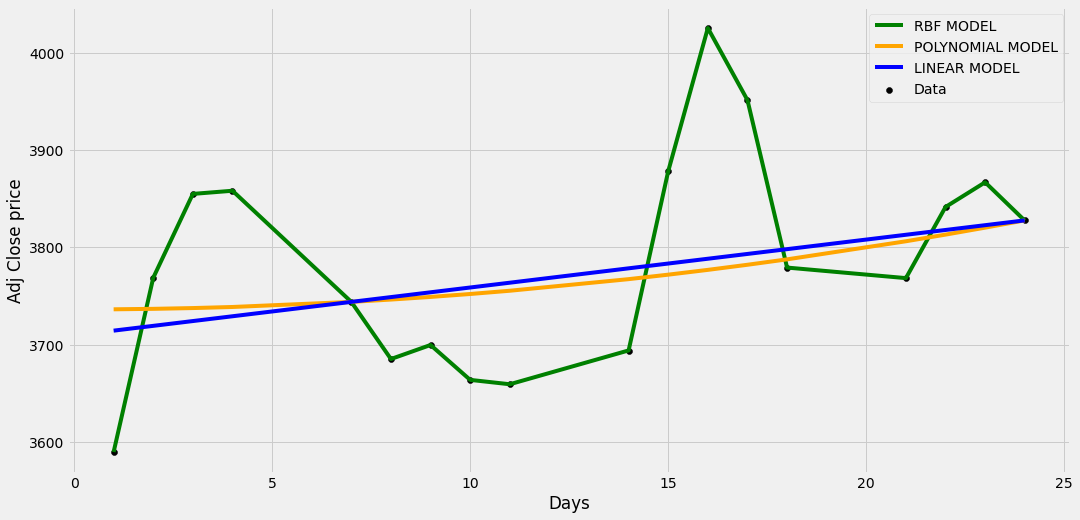

In [ ]:
#plot the models
plt.figure(figsize=(16,8))
plt.scatter(days, adj_price,color = 'black', label = 'Data')
plt.plot(days, rbf_svr.predict(days), color = 'green', label = "RBF MODEL")
plt.plot(days, poly_svr.predict(days), color = 'orange', label = "POLYNOMIAL MODEL")
plt.plot(days, lin_svr.predict(days), color = 'blue', label = "LINEAR MODEL")
plt.xlabel("Days")
plt.ylabel("Adj Close price")
plt.legend()
plt.show()

In [ ]:
#show the predicted price for a given day
day = [[30]]
print('The RBF SVR predicted price: ', rbf_svr.predict(day))
print('The POLY SVR predicted price: ', poly_svr.predict(day))
print('The Linear SVR predicted price: ', lin_svr.predict(day))

The RBF SVR predicted price:  [3776.31056053]
The POLY SVR predicted price:  [3879.35786657]
The Linear SVR predicted price:  [3857.39411765]
